# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [44]:
df=pd.read_csv("telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA:

In [45]:
df.shape

(7043, 21)

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From above,we can observe that except the 'TotalCharges' column everything is fine.Let's check the reason behind object datatype.

In [48]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are empty spaces in the column.So,this makes the column marking as object data type.

In [49]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [50]:
df.dtypes['TotalCharges']

dtype('O')

Now let's convert it's data type to float data type.

In [51]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [52]:
df.dtypes['TotalCharges']

dtype('float64')

In [53]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The TotalCharges column has nullvalues,so we can replace null values with it's mean values.

In [54]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [55]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

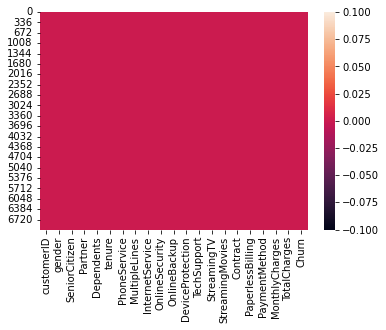

In [56]:
sns.heatmap(df.isnull())

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [59]:
df.drop(['customerID'],axis=1,inplace=True)

# Data Visualisation:

In [60]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Univariate Analysis:

Male      3555
Female    3488
Name: gender, dtype: int64


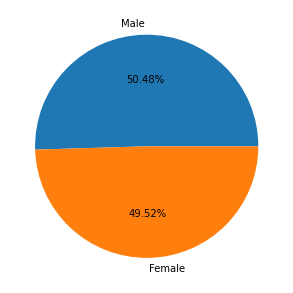

In [61]:
fig,x=plt.subplots(figsize=(5,6))
labels='Male','Female'
x.pie(df['gender'].value_counts(),autopct='%0.2f%%',labels=labels)
print(df["gender"].value_counts())
plt.show()

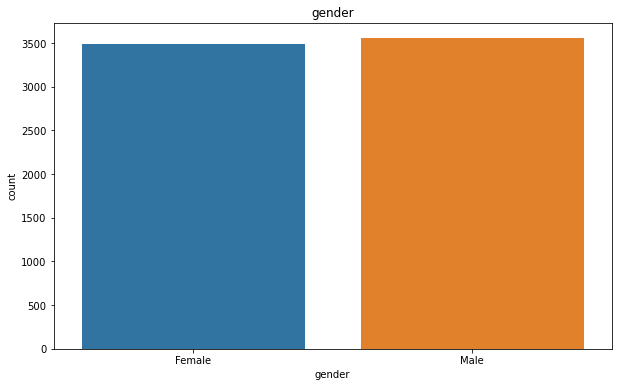

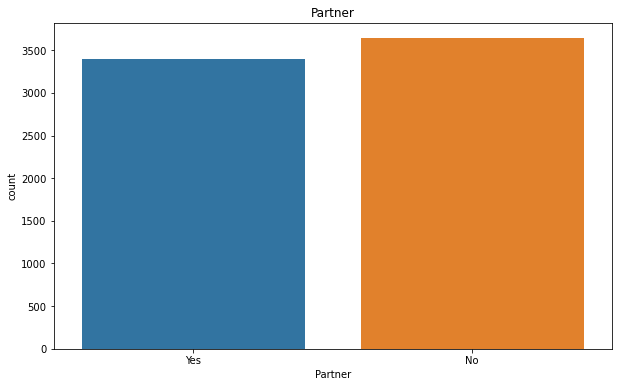

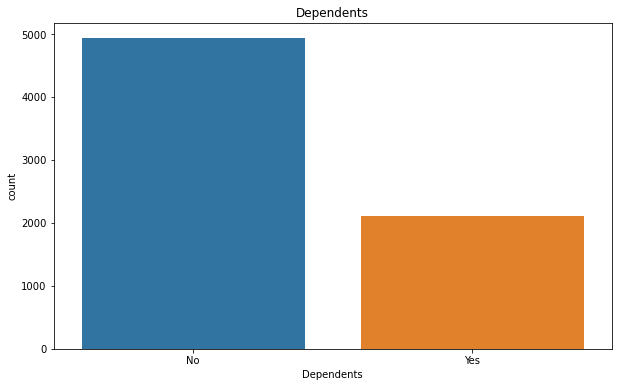

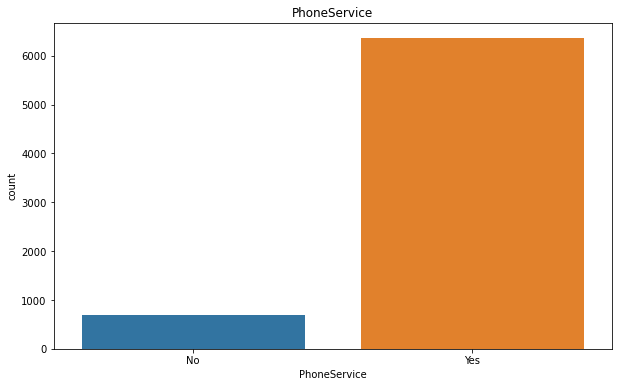

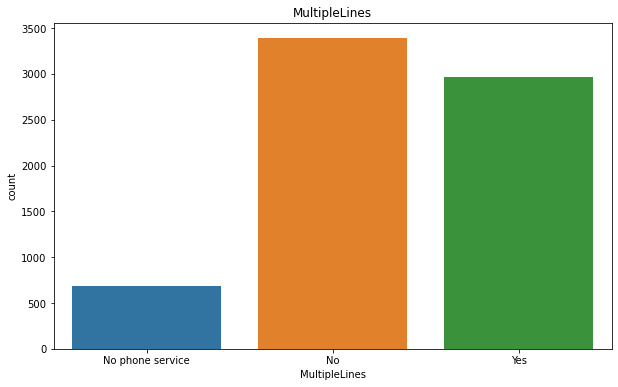

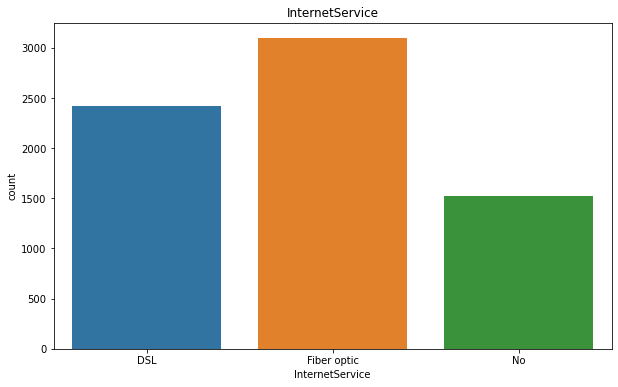

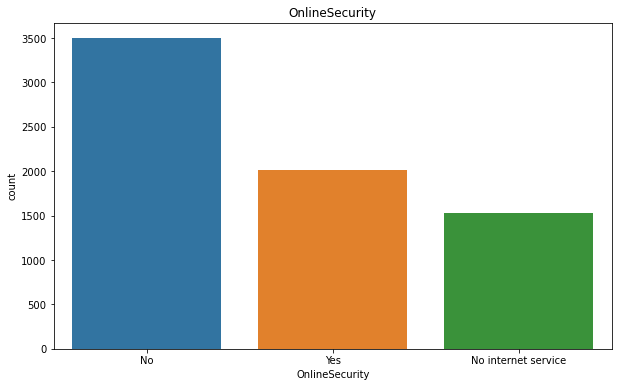

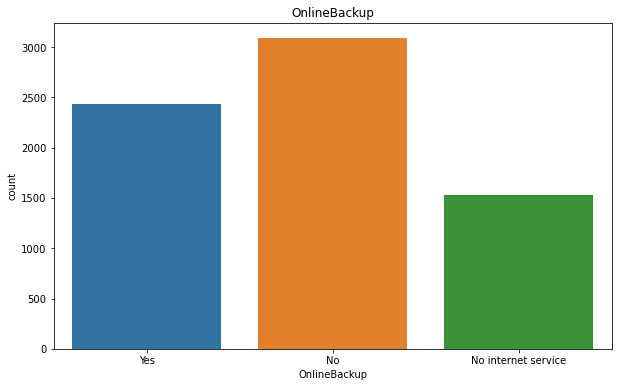

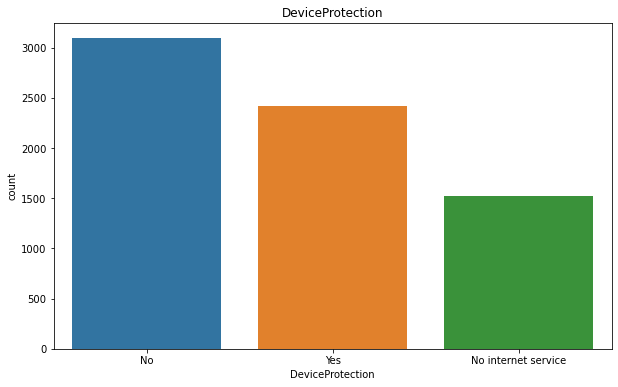

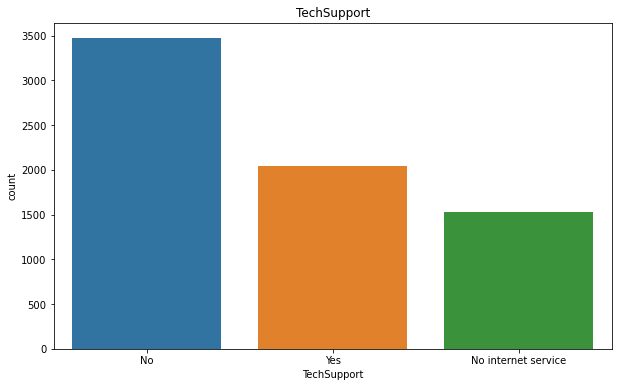

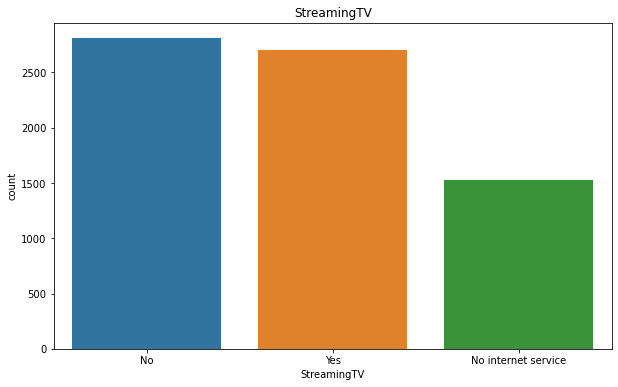

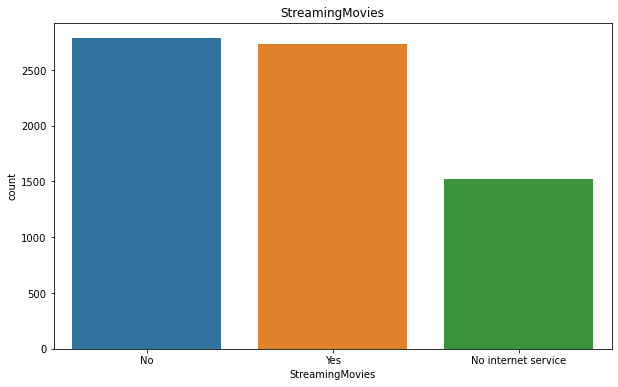

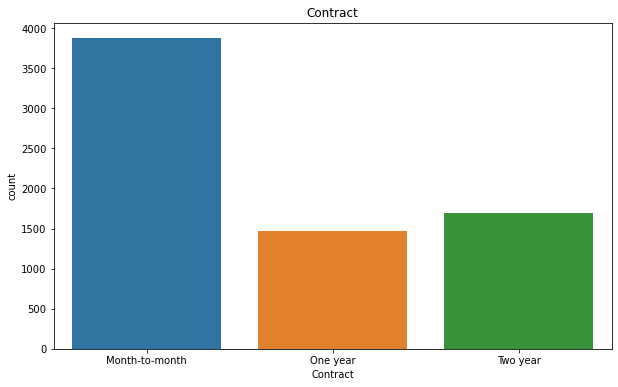

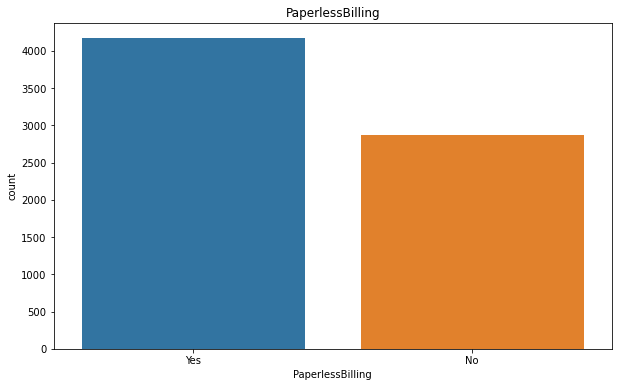

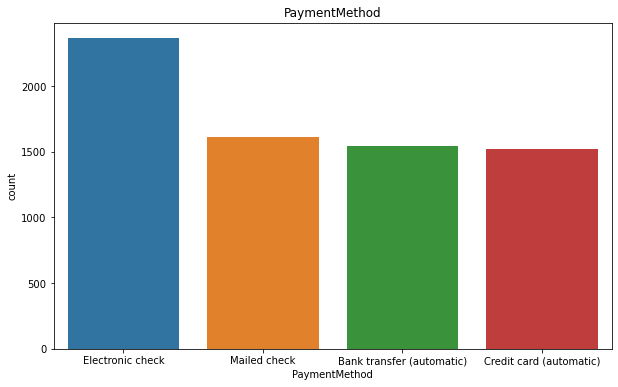

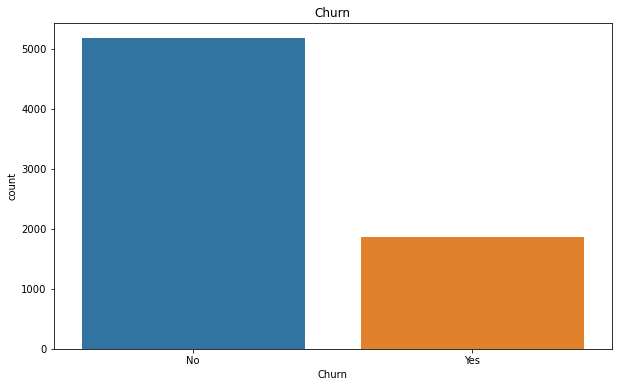

In [62]:
for i in df[cat_cols]:              
    plt.figure(figsize = (10,6))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='tenure', ylabel='count'>

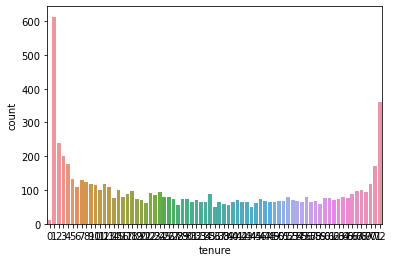

In [63]:
sns.countplot(df['tenure'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

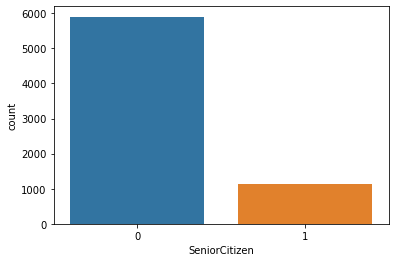

In [64]:
sns.countplot(df['SeniorCitizen'])

In [65]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

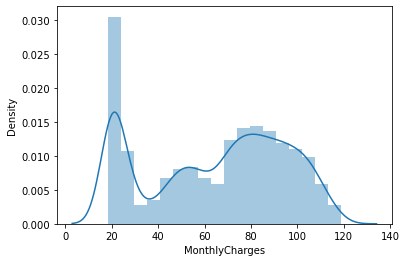

In [66]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

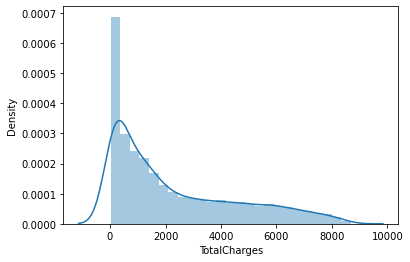

In [67]:
sns.distplot(df['TotalCharges'])

Bivariate Analysis:

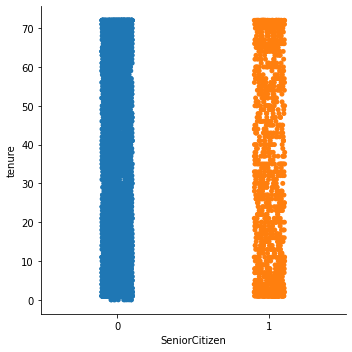

In [68]:
sns.catplot(x="SeniorCitizen",y="tenure",data=df)

Multivariate Analysis:

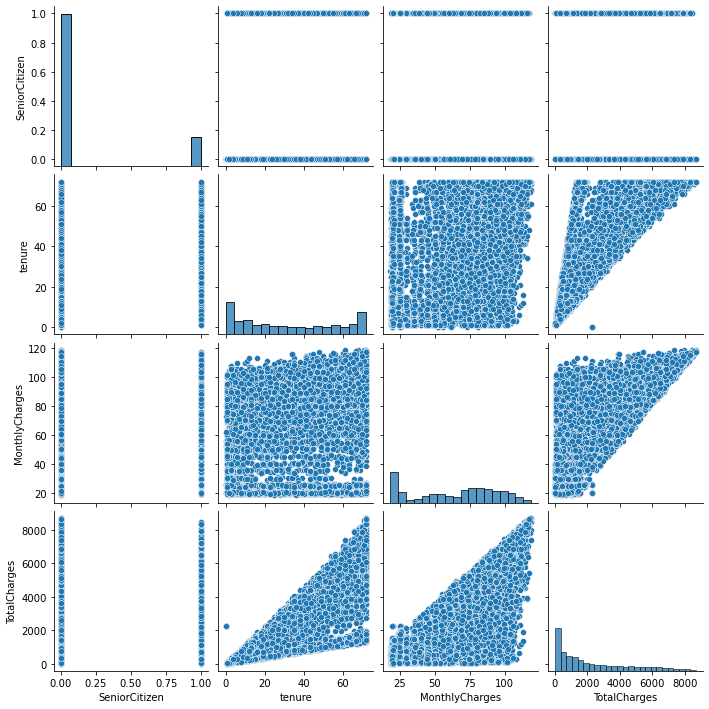

In [69]:
sns.pairplot(df)

# Encoding:

In [70]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(enc.fit_transform)

# Skewness:

In [71]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Other than categorical columns and target column, no other column has skewness.

# Outliers:

<AxesSubplot:>

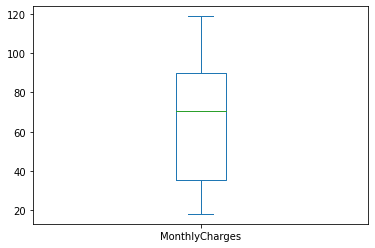

In [72]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

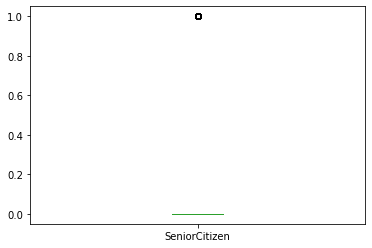

In [73]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

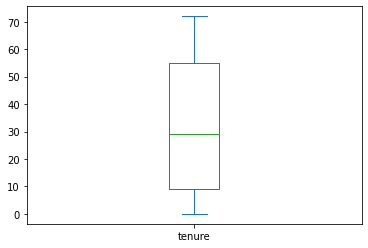

In [74]:
df['tenure'].plot.box()

<AxesSubplot:>

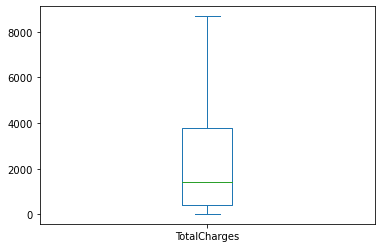

In [75]:
df['TotalCharges'].plot.box()

# Removing Outliers:

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [77]:
df.shape

(7043, 20)

In [78]:
df_new.shape

(6361, 20)

# Percentage of Loss:

In [79]:
loss=((7043-6361)/7043)*100
loss

9.683373562402386

# Correlation:

In [80]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


<AxesSubplot:>

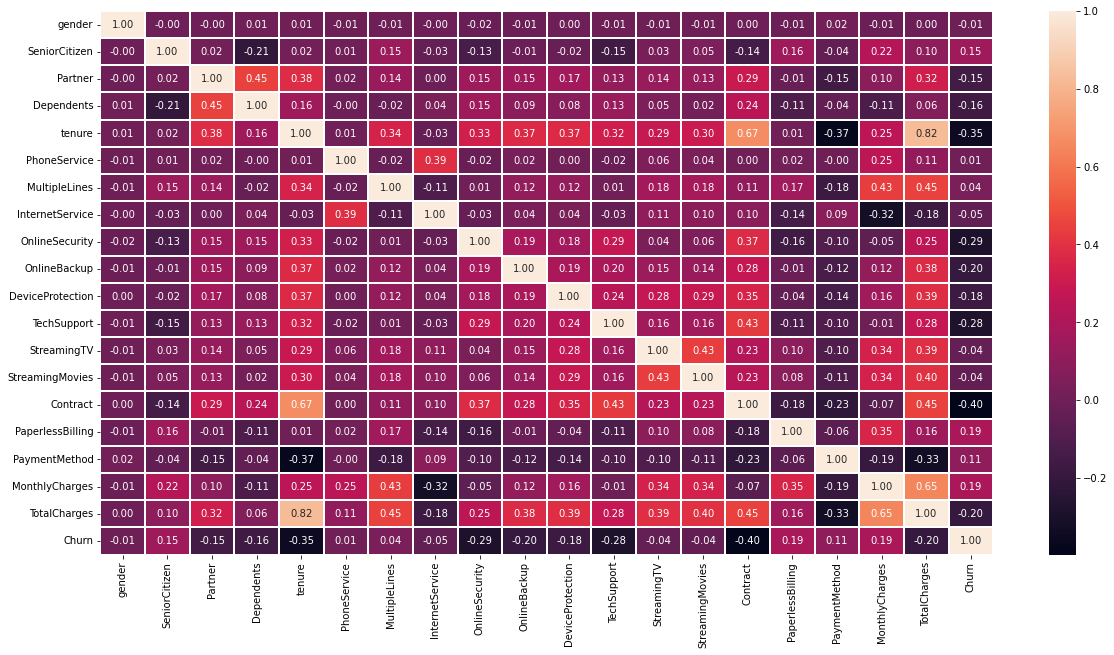

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,fmt="0.2f")

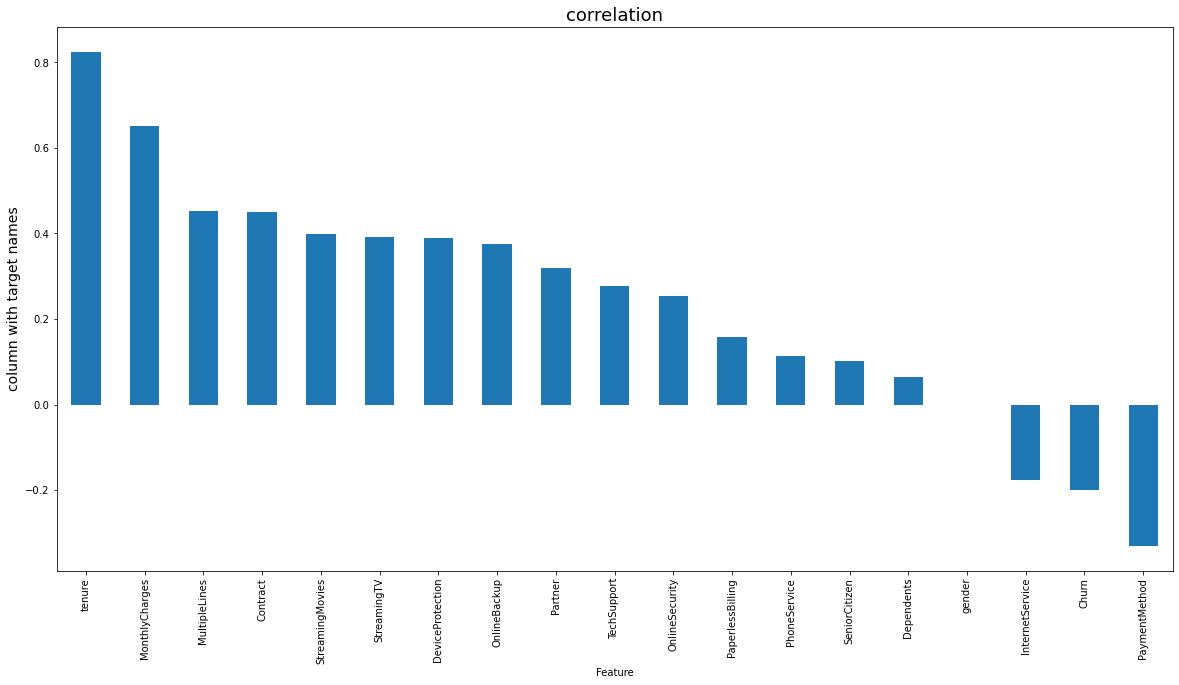

In [82]:
plt.figure(figsize=(20,10))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Seperating the columns into Features and Target as x and y:

In [83]:
x=df.drop("TotalCharges",axis=1)
y=df["TotalCharges"]

# Scaling:

In [96]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    predrfr=RFR.predict(x_test)
    acc=r2_score(y_test,predrfr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

Best Accuracy Score is:  0.9988682600881491 on Random_state:  82


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=.30)

# Random Forest Regression:

In [94]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predrfr=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,predrfr))
print('MAE:',mean_absolute_error(y_test, predrfr))
print('MSE:',mean_squared_error(y_test, predrfr))

R2_score: 0.9988894988977832
MAE: 52.080857225114336
MSE: 5973.876450342826


# Linear Regression:

In [100]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predlr))
print('MAE:',mean_absolute_error(y_test,predlr))
print('MSE:',mean_squared_error(y_test,predlr))

R2_score: 0.9074929281852413
MAE: 566.0512579185296
MSE: 497636.4424143528


# DecisionTree Regressor:

In [98]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,preddtr))
print('MAE:',mean_absolute_error(y_test, preddtr))
print('MSE:',mean_squared_error(y_test, preddtr))

R2_score: 0.9971592462443534
MAE: 82.09550402271653
MSE: 15281.67052531945


# GradientBoosting Regressor:

In [99]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predgbr=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,predgbr))
print('MAE:',mean_absolute_error(y_test, predgbr))
print('MSE:',mean_squared_error(y_test, predgbr))

R2_score: 0.9982067853432051
MAE: 70.82174708557274
MSE: 9646.494530489976


# CrossValidation:

In [103]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9987321355172675


In [104]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.9036760551627913


In [105]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9973436232693746


In [106]:
print(cross_val_score(GBR,x,y,cv=5).mean())

0.998099355806106


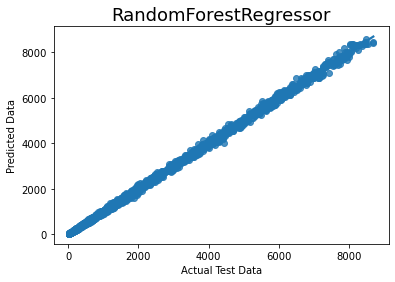

In [108]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
sns.regplot(y_test,predrfr)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

# Regularization:

In [112]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls=Lasso()
gs=GridSearchCV(ls,parameters)
gs.fit(x_train,y_train)
gs.best_params_

{'alpha': 1, 'random_state': 0}

In [113]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
r2_score(y_test,pred_ls)*100

90.7532623534654

In [115]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9036720405605791

# HyperParameter Tuning:

In [116]:
rfr = RandomForestRegressor()
parameters={'n_estimators' : [100,200],'criterion':['mse','mae']}
gridsearch=GridSearchCV(rfr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'mse', 'n_estimators': 200}

In [117]:
rfr = RandomForestRegressor(criterion='mse',n_estimators=200)
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
r2_score(y_test,pred)

0.9988841272413728

After Hyperparameter Tuning our model is performing extremely well with almost 100% accuracy.

# Saving the Model:

In [120]:
import pickle 
filename='Customer_Churn_Analysis.pickle'
pickle.dump(rfr,open(filename,'wb'))